In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [285]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.000,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.000,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.000,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.000,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
5,90.000,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
7,60.000,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
8,65.000,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
9,80.000,1,123,0,35,1,388000.00,9.40,133,1,1,10,1


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<AxesSubplot:>

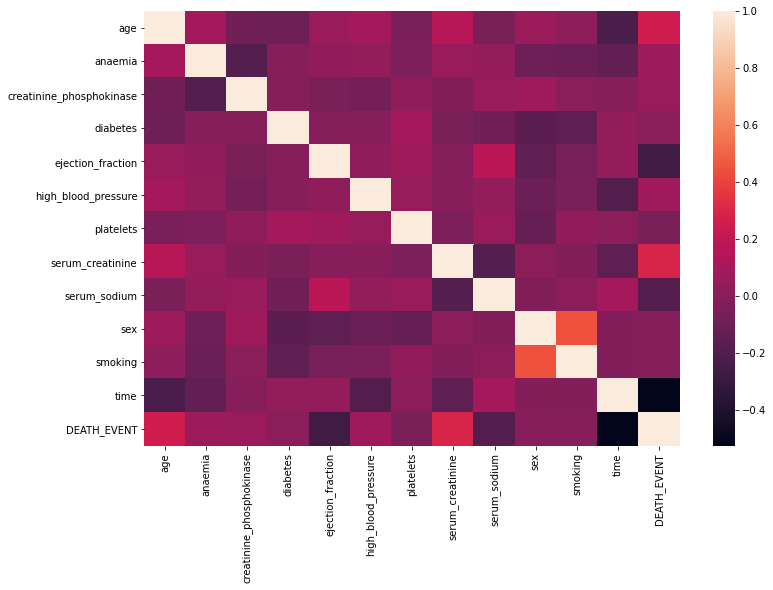

In [287]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr)

In [288]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [289]:
feat_cat = [f for f in df.iloc[:,:-1].columns if len(df[f].unique())<5]

In [290]:
feat_cat

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

<AxesSubplot:xlabel='anaemia', ylabel='Count'>

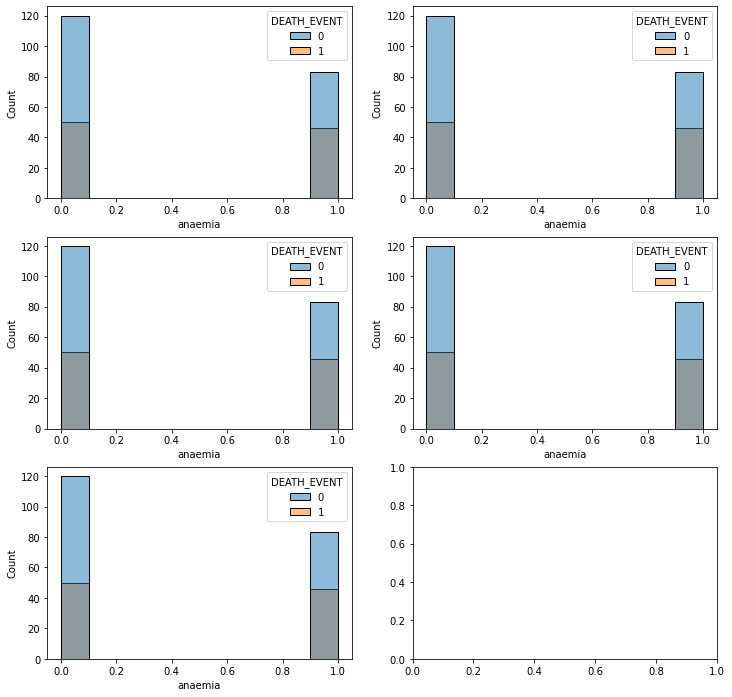

In [291]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
sns.histplot(data=df, x="anaemia", hue="DEATH_EVENT", ax=axes[0,0])
sns.histplot(data=df, x="anaemia", hue="DEATH_EVENT", ax=axes[0,1])
sns.histplot(data=df, x="anaemia", hue="DEATH_EVENT", ax=axes[1,0])
sns.histplot(data=df, x="anaemia", hue="DEATH_EVENT", ax=axes[1,1])
sns.histplot(data=df, x="anaemia", hue="DEATH_EVENT", ax=axes[2,0])

In [292]:
feat_dist = [f for f in df.iloc[:,:-1].columns if f not in feat_cat]

In [293]:
feat_dist

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

<AxesSubplot:xlabel='time', ylabel='Count'>

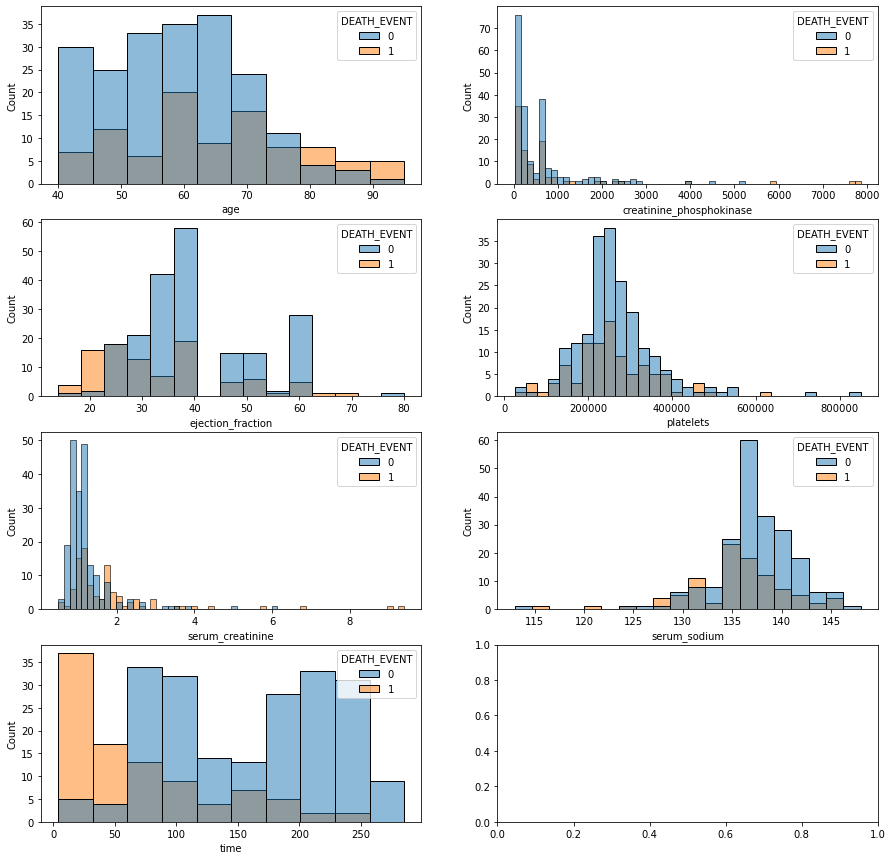

In [294]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
sns.histplot(data=df, x="age", hue="DEATH_EVENT", ax=axes[0,0])
sns.histplot(data=df, x="creatinine_phosphokinase", hue="DEATH_EVENT", ax=axes[0,1])
sns.histplot(data=df, x="ejection_fraction", hue="DEATH_EVENT", ax=axes[1,0])
sns.histplot(data=df, x="platelets", hue="DEATH_EVENT", ax=axes[1,1])
sns.histplot(data=df, x="serum_creatinine", hue="DEATH_EVENT", ax=axes[2,0])
sns.histplot(data=df, x="serum_sodium", hue="DEATH_EVENT", ax=axes[2,1])
sns.histplot(data=df, x="time", hue="DEATH_EVENT", ax=axes[3,0])

In [295]:
X = df.iloc[:,:-1]
y = df['DEATH_EVENT']

In [296]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [297]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [298]:
X.drop(['sex'], axis =1 , inplace = True)

In [299]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [300]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.014235
5,0.909091,1.0,0.003062,0.0,0.393939,1.0,0.216875,0.179775,0.542857,1.0,0.014235
6,0.636364,1.0,0.028451,0.0,0.015152,0.0,0.123530,0.078652,0.685714,0.0,0.021352
7,0.363636,1.0,0.037254,1.0,0.696970,0.0,0.519942,0.067416,0.514286,1.0,0.021352
8,0.454545,0.0,0.017096,0.0,0.772727,0.0,0.288833,0.112360,0.714286,0.0,0.021352
9,0.727273,1.0,0.012758,0.0,0.318182,1.0,0.439932,1.000000,0.571429,1.0,0.021352


In [301]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y,test_size=0.2, random_state=1)

In [302]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
model1 = clf.fit(X_train, y_train)
pred1 = model1.predict(X_test)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.77      0.71      0.74        14

    accuracy                           0.88        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.88      0.88      0.88        60



In [303]:
import xgboost as xg
classifier = xg.XGBClassifier(eval_metric='mlogloss', use_label_encoder =False)
model2 = classifier.fit(X_train, y_train)
pred2 = model2.predict(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        46
           1       0.79      0.79      0.79        14

    accuracy                           0.90        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.90      0.90      0.90        60



In [304]:
params = {
    'learning_rate' : [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}
from sklearn.model_selection import RandomizedSearchCV
grid=GridSearchCV(classifier,param_grid=params,scoring='roc_auc',n_jobs=-1,cv=3,verbose=2)

In [305]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 810 candidates, totalling 2430 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='mlogloss',
                                     gamma=0, gpu_id=-1, importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=10...
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact',
                 

In [306]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='mlogloss',
              gamma=2, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=3, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [307]:
classifier_tuned = grid.best_estimator_

In [308]:
model2_tuned = classifier_tuned.fit(X_train,y_train)

In [309]:
pred2_tuned = model2_tuned.predict(X_test)
print(classification_report(y_test,pred2_tuned))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        46
           1       0.83      0.71      0.77        14

    accuracy                           0.90        60
   macro avg       0.88      0.84      0.85        60
weighted avg       0.90      0.90      0.90        60



In [310]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [311]:
params = { 'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
          'C' : [0.1,1,10,100],
          'degree' : [1,2,3,4,5,6,7,8,9]   
}

In [312]:
grid = GridSearchCV(SVC(), params)

In [313]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [314]:
grid.best_estimator_

SVC(C=1, degree=1, kernel='linear')

In [315]:
clf = SVC(C=1, degree=1, kernel='linear')
model3 = clf.fit(X_train,y_train)
pred3 = model3.predict(X_test)
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.77      0.71      0.74        14

    accuracy                           0.88        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.88      0.88      0.88        60



In [316]:
params = {'n_estimators': [i for i in range(1,50)],
          'max_depth': [2,4,6],
}

In [317]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
grid = GridSearchCV(estimator = rf, param_grid = params, cv = 3, verbose=2, n_jobs = -1)

In [318]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 147 candidates, totalling 441 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=2)

In [319]:
grid.best_estimator_

RandomForestClassifier(max_depth=2, n_estimators=3)

In [320]:
rf_t = grid.best_estimator_

In [321]:
model_rf = rf_t.fit(X_train, y_train)

In [322]:
pred_rf = model_rf.predict(X_test)
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        46
           1       0.86      0.43      0.57        14

    accuracy                           0.85        60
   macro avg       0.85      0.70      0.74        60
weighted avg       0.85      0.85      0.83        60

